# Project #2

PID = "730136744"

## Hypothesis 
I hypothesize that there will be a correlation with unemployment adn children not enrolled in school because when people loose their jobs they someitmes need their chidren to work to supplement the inoome or help around the house/ buisness.

adding an auto reload like the previous projects

In [19]:
%reload_ext autoreload
%autoreload 2

Importing numpy and pandas. 
Creating names constants for the columns I chose to make them easier to understand and follow.

In [29]:
import numpy as np
import pandas as pd
unemploy = "SL.UEM.TOTL.ZS"
percentnotinschool = "SE.PRM.UNER.ZS"

Reading in my data using read_cvs and the cvs file we were given.

In [25]:
data = pd.read_csv('../../data/databank_education_2018.csv')

Getting the shape of the data and printing out the first 10 rows

In [62]:
print(data.shape)
data.head(10)

(244, 94)


,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


Selecting only the columns that I am interested in and printing the shape and first 10 rows of that. 

In [41]:
mydata = data[["Country", unemploy, percentnotinschool]]
print(mydata.shape)
data[["Country", unemploy, percentnotinschool]].head(10)

(244, 3)


,Country,SL.UEM.TOTL.ZS,SE.PRM.UNER.ZS
0,Afghanistan,11.060000,NaN
1,Albania,12.300000,2.55779
2,Algeria,11.890000,0.35250
3,Andorra,NaN,NaN
4,Angola,7.000000,NaN
5,Antigua and Barbuda,NaN,0.68990
6,Arab World,10.256798,14.73469
7,Argentina,9.220000,NaN
8,Armenia,18.969999,6.90522
9,Aruba,NaN,NaN


Getting rid of the countries who are missing the data I am interasted in. Printing the shape of this new data and the first 10 rows. There are now only 159 rows. 

In [40]:
data_no_na = mydata[mydata[unemploy].notna() & mydata[percentnotinschool].notna()]
print(data_no_na.shape)
data_no_na.head(10)

(159, 3)


,Country,SL.UEM.TOTL.ZS,SE.PRM.UNER.ZS
1,Albania,12.300000,2.55779
2,Algeria,11.890000,0.35250
6,Arab World,10.256798,14.73469
8,Armenia,18.969999,6.90522
10,Australia,5.300000,0.42838
11,Austria,4.850000,0.04370
12,Azerbaijan,4.900000,3.89419
13,"Bahamas, The",10.000000,23.53087
14,Bahrain,1.510000,1.03658
16,Barbados,10.000000,1.61179


Sorting my data in decending order of unemployment. Printing the first 10 rows.

In [43]:
sorteddata = data_no_na.sort_values(by=[unemploy], ascending=False)
sorteddata.head(10)

,Country,SL.UEM.TOTL.ZS,SE.PRM.UNER.ZS
200,South Africa,26.910000,11.007960
239,West Bank and Gaza,26.260000,2.628590
66,Eswatini,22.370001,16.349140
164,North Macedonia,20.740000,0.698200
156,Namibia,19.879999,1.518960
206,St. Lucia,19.290001,1.434850
82,Greece,19.290001,1.428420
8,Armenia,18.969999,6.905220
110,Jordan,16.290001,19.023251
203,Spain,15.260000,3.075900


Creating a scatter plot with one series as the X-axis and the other as the Y-axis. Labeling the axes and giving it a title.

Text(0, 0.5, 'Children out of school (% of primary school age)')

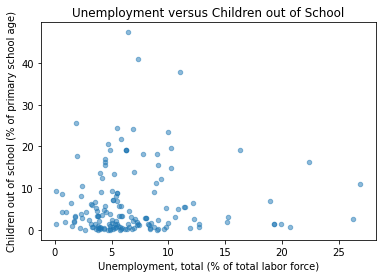

In [66]:
import matplotlib.pyplot as plt
x= unemploy 
y= percentnotinschool
sp = sorteddata.plot.scatter(x, y, alpha=0.5, title='Unemployment versus Children out of School')
sp 
sp.set_xlabel("Unemployment, total (% of total labor force)")
sp.set_ylabel("Children out of school (% of primary school age)")


Creating a scatterplot with a linear regression line.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Unemployment vs. Children out of school')

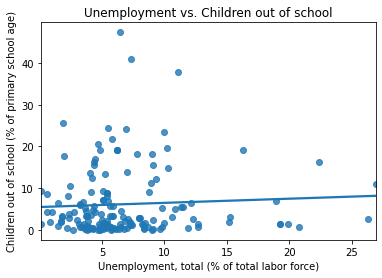

In [77]:
import seaborn as sns
from __future__ import annotations
x = np.array(mydata[unemploy])
y = np.array(mydata[percentnotinschool])
spl = sns.regplot(x, y, ci=None)
spl.set_xlabel("Unemployment, total (% of total labor force)")
spl.set_ylabel("Children out of school (% of primary school age)")
spl.set_title("Unemployment vs. Children out of school")

Finding the correlation btw my two series. 

In [61]:
correlation = sorteddata[unemploy].corr(sorteddata[percentnotinschool])
print(correlation)

0.057373279968206646


## Conclusion
The correlation (~.057) is close to zero indicating a very minimal correlation between the two indicators. The correlation is slightly positive indiation that as one got higher the other did as well which is in line with my hypothesis but it is not strong enought to make any statement. This means that my data does not support my hypothesis that countries with higher unemployment rates will have more children out of school. there are clearly other factors at play in these two statistics. In order to support my hypothesis I wuld have needed a strong positve correlation (close to 1). 